In [5]:
# Import packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import os
import warnings
import glob
import peakutils 

In [6]:
# Check for all the modules that required if not exist then exit with notification.
import sys
import imp
try:
    imp.find_module('numpy')
    foundnp = True
except ImportError:
    foundnp = False
try:
    imp.find_module('matplotlib')
    foundplot = True
except ImportError:
    foundplot = False
try:
    imp.find_module('pandas')
    foundpd = True
except ImportError:
    foundplot = False
if not foundnp:
    print("Numpy is required. Exiting")
    sys.exit()
if not foundplot:
    print("Matplotlib is required. Exiting")
    sys.exit()
if not foundpd:
    print("Pandas is required. Exiting")
    sys.exit()

In [7]:
# This part use classification. All the following code blocks with correct indentation should be able to use the same style. 
# part of _init_
class cv:
    _colors = {'red': 'r', 'green': 'g', 'blue': 'b', 'yellow': 'y', 'cyan': 'c', 'magenta': 'm', 'black': 'k', 'white': 'w'}
    _linestyles = {' ': ' ', '-': 'solid', '--': 'dashed', '-.': 'dash_dot', ':': 'dotted'}
    _markers  = {' ': ' ', '.': '.', '_' : '_', 'o': 'o', '*': '*', '+': '+', 'x': 'x', 'square': 's', 'triangle': '^', 'diamond': 'd'}


In [8]:
# Find relevant files in folder
path = os.getcwd()
extension = ['csv','txt','dat'] # Should include all the possible ones
os.chdir(path)
result = [i for i in glob.glob('*.{}'.format(extension))]
print("Plotting the following:")
print(result)
#Make x-axis
t = np.linspace(325, 1100, 776)

Plotting the following:
[]


In [9]:
df=pd.read_csv('../PadraoK3_Gaiola_cell3eletrodos.txt', sep='\t')
df.head()

,E /V,I /uA,I /uA.1
0,0.500,0.130,7.040
1,0.499,0.102,6.998
2,0.498,0.083,6.964
3,0.497,0.064,6.932
4,0.496,0.061,6.908


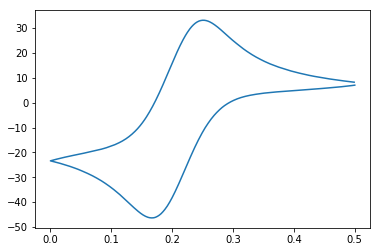

In [10]:
%matplotlib inline
plt.plot(df['E /V'],df['I /uA.1'])

In [12]:
def split_column(column):
    
    first_half = int(len(column)/2)
    second_half = int(len(column))
    col_array = np.array(column)
    col1 = col_array[0:first_half]
    col2 = col_array[(first_half):second_half]
    return col1, col2

In [13]:
split_column(df['I /uA.1'])

(array([ 7.0400e+00,  6.9980e+00,  6.9640e+00,  6.9320e+00,  6.9080e+00,
         6.8710e+00,  6.8410e+00,  6.8120e+00,  6.7850e+00,  6.7560e+00,
         6.7280e+00,  6.6980e+00,  6.6690e+00,  6.6420e+00,  6.6130e+00,
         6.5840e+00,  6.5550e+00,  6.5300e+00,  6.5050e+00,  6.4780e+00,
         6.4520e+00,  6.4250e+00,  6.4010e+00,  6.3770e+00,  6.3510e+00,
         6.3230e+00,  6.3020e+00,  6.2760e+00,  6.2490e+00,  6.2270e+00,
         6.2090e+00,  6.1950e+00,  6.1760e+00,  6.1530e+00,  6.1290e+00,
         6.1070e+00,  6.0850e+00,  6.0570e+00,  6.0310e+00,  6.0100e+00,
         5.9950e+00,  5.9790e+00,  5.9580e+00,  5.9350e+00,  5.9130e+00,
         5.8960e+00,  5.8740e+00,  5.8550e+00,  5.8340e+00,  5.8130e+00,
         5.7940e+00,  5.7730e+00,  5.7510e+00,  5.7280e+00,  5.7060e+00,
         5.6840e+00,  5.6640e+00,  5.6410e+00,  5.6200e+00,  5.6000e+00,
         5.5820e+00,  5.5650e+00,  5.5460e+00,  5.5280e+00,  5.5090e+00,
         5.4910e+00,  5.4720e+00,  5.4500e+00,  5.4

In [ ]:
def peak_detection(data_y):
    """ peak_detection(dataframe['y column'])
    This function returns a list of the indecies of the y values of the peaks detected in the dataset.
    The function takes an input of the column containing the y variables in the dataframe.
    This column is then split into two arrays, one of the positive and one of the negative values.
    This is because cyclic voltammetry delivers negative peaks however the peakutils function work better with positive peaks.
    The absolute values of each of these vectors are then imported into the peakutils.indexes 
    function to determine the significant peak(s) for each array. The value(s) are then saved as a list."""
    
    index_list = []
    
    y1, y2 = split_column(data_y)
    
    peak_top = peakutils.indexes(y2, thres=0.05, min_dist=0.001)
    peak_bottom = peakutils.indexes(abs(y1), thres=0.05, min_dist=0.001)
    index_list.append([peak_top[0], peak_bottom[0]])
    
    return index_list

In [ ]:
peak_detection(df['I /uA.1'])

In [16]:
y1, y2 = split_column(df['I /uA.1'])

In [18]:
peak = peakutils.indexes(y2, thres=0.9, min_dist=0.001)
peak2 = peakutils.indexes(abs(y1), thres=0.6, min_dist=0.001)
print(peak)

[251]


In [ ]:
def interpolation(data_x, data_y):
    """interpolation(dataframe['x column'], dataframe['y column'])
    This function returns a list of the fitted values of the peals in the dataset.
    It calls the peak_detection function and type casts the outputs to numpy ndarrays
    (as that is what the peakutils.interpolation function takes in).
    The function also typecasts the x and y value columns to numpy ndarrays.
    The function then uses the peakutils.interpolation function to enhance the resolution of the peak values.
    This gives more precise numbers. The function returns a list."""
    
    x = np.array(data_x)
    y = np.array(data_y)

    index = peak_detection(data_y)[0]
    index = np.asarray(index)

    smooth_index = []
    smooth = peakutils.interpolate(x, y, ind=index)
    smooth_index.append(list(smooth))

    return smooth_index

In [ ]:
interpolation(df['E /V'],df['I /uA.1'])

In [ ]:
import file_read

In [ ]:
def wrap_peaks(data,n_cycle):
    """wrap_peaks(dataframe, array of cycle #s)
    This function returns a dictonary of peak indecies corresponding to a specific cycle number,
    where the key is the cycle number and the value is the peak indecies.
    This function takes in the dataframe and a single numeric value or array
    of numeric values corresponding to the cycle number(s) of interest.
    The function utilizes a for loop, in the range of the cycle number array,
    to call the interpolation function to compute the peak indecies at each cycle number or interest."""
    
    cycle_values = {}
    # key in cycle number, value is list of peak indexes from interpolation fxn
    
    for key, value in n_cycle:
        index_values = interpolation(data.iloc[0][i], data.iloc[2][i])
        cycle_values[i] = index_values
        
    return cycle_values

In [ ]:
#n_cycle = 
wrap_peaks(df, n_cycle)

In [ ]:
def test_peak_detection():
    
    
    # check if the output type is a list
    assert isinstance(peak_detection(data_y), list)
    
    # check if the output value is an int
    # so it is known that it is an index and not the value
    assert (peak_detection(data_y)[0]) == int
    
    #check that second index is less that len(df)/2

In [ ]:
def test_interpolation():
    
        
    # check if the output type is a list
    assert isinstance(peak_detection(data_y), list)
    
    # check if the output value is a float
    # know that it is the value at the index and not just the index
    assert (peak_detection(data_y)[0]) == float

In [ ]:
def test_wrap_peaks():